# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#________________starer code_____________________________________#
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #changed to 15 from 1500 for testing
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) #changed to 15 from 1500 for testing
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#_________________________end starter code______________________________________#


85

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set up api/ create URL
import json

#target each citi in list "cities" found above
url = "http://api.openweathermap.org/data/2.5/weather?"

#build query url and exception
record_number = 0
count = 1
batch = 1

#define lists to capture from Open Weather Site
city_name = []
city_lat = []
city_long = []
temp = []
humidity = []
country = []
cloudiness = []
windspeed = []
date = []

#loop to create list of found data and grab info from api for dataframe
for i, x  in enumerate(cities):
    #set groups of 50
    if count <= 50:
        count +=1        
    else:
        batch += 1 #set of first 50
        count = 0       
    record_number += 1
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + x
        print(f'Processing Record {record_number} of set {batch} for City: {x}')
        cities_response = requests.get(query_url).json()
        
        #store data to lists
        city_name.append(cities_response['name'])
        city_lat.append(cities_response['coord']['lat'])
        city_long.append(cities_response['coord']['lon'])
        cloudiness.append(cities_response['clouds']['all'])
        temp.append(cities_response['main']['temp'])
        humidity.append(cities_response['main']['humidity']) 
        country.append(cities_response['sys']['country'])
        windspeed.append(cities_response['wind']['speed'])
        date.append(cities_response['dt'])
    except KeyError:
        print(f'No information found for city: {x}') 

Processing Record 1 of set 1 for City: alofi
Processing Record 2 of set 1 for City: hermanus
Processing Record 3 of set 1 for City: lashio
Processing Record 4 of set 1 for City: dera din panah
No information found for city: dera din panah
Processing Record 5 of set 1 for City: cape town
Processing Record 6 of set 1 for City: lazaro cardenas
Processing Record 7 of set 1 for City: kodiak
Processing Record 8 of set 1 for City: sentyabrskiy
No information found for city: sentyabrskiy
Processing Record 9 of set 1 for City: port alfred
Processing Record 10 of set 1 for City: san luis obispo
Processing Record 11 of set 1 for City: dawlatabad
Processing Record 12 of set 1 for City: albany
Processing Record 13 of set 1 for City: aripuana
Processing Record 14 of set 1 for City: gotsu
Processing Record 15 of set 1 for City: busselton
Processing Record 16 of set 1 for City: ibra
Processing Record 17 of set 1 for City: seoul
Processing Record 18 of set 1 for City: tura
Processing Record 19 of set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_dict = {"City Name" : city_name, "Latitude":city_lat, "Longitude":city_long, "Temperature": temp, "Humidity": humidity, "Cloudiness":cloudiness, "Windspeed":windspeed, "Date":date }
cities_df = pd.DataFrame(cities_dict)
cities_df['Date']=pd.to_datetime(cities_df['Date'], unit='s')
cities_df.to_csv("../output_data/Citiesweather.csv", index = False, header = True)

In [5]:
cities_df

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Date
0,Alofi,-19.06,-169.92,298.15,61,40,7.70,2020-07-14 21:15:57
1,Hermanus,-34.42,19.23,277.04,92,7,3.58,2020-07-14 21:15:57
2,Lashio,22.93,97.75,293.45,99,99,0.17,2020-07-14 21:15:57
3,Cape Town,-33.93,18.42,281.39,76,4,4.10,2020-07-14 21:14:49
4,Lázaro Cárdenas,17.96,-102.20,303.67,64,0,4.86,2020-07-14 21:15:58
...,...,...,...,...,...,...,...,...
75,Castro,-24.79,-50.01,286.76,66,0,1.35,2020-07-14 21:16:07
76,Kahului,20.89,-156.47,300.83,46,40,9.30,2020-07-14 21:16:07
77,Guachetá,5.38,-73.69,289.29,58,17,4.47,2020-07-14 21:16:07
78,Codrington,-38.27,141.97,277.72,95,41,3.13,2020-07-14 21:16:07


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#check for cities with high humidity
if len(cities_df.loc[cities_df['Humidity'] > 100]):
    #keep those with humidity less than 100
    high_humidity_df = cities_df.loc[cities_df['Humidity'] > 100]
    clean_cities_df = cities_df.loc[cities_df['Humidity'] <= 100]
    #Get the indices of cities that have humidity over 100%.
    high_humidity_label = cities_df[cities_df['Humidity']>100].index.tolist()
    print(high_humidity_label)
    print(high_humidity_df)
else:
    clean_cities_df = cities_df

In [7]:
    ##__________________review with tutor_________________________________-##


    # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
    #condition= cities_df.loc[cities_df['Humidity'] < 100]
    #clean_cities_df = cities_df.where(cond=cities_df.loc[cities_df['Humidity'] < 100],inplace=False)
    # Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


    #print(clean_city_data_df)
    #print(clean_cities_df)

In [8]:
    # Extract relevant fields from the data frame
    # Export the City_Data into a csv
    clean_cities_df.to_csv("../output_data/clean_cities_data.csv", index = False, header = True)
    clean_cities_df['just_date'] = clean_cities_df['Date'].dt.date
    clean_cities_df

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Date,just_date
0,Alofi,-19.06,-169.92,298.15,61,40,7.70,2020-07-14 21:15:57,2020-07-14
1,Hermanus,-34.42,19.23,277.04,92,7,3.58,2020-07-14 21:15:57,2020-07-14
2,Lashio,22.93,97.75,293.45,99,99,0.17,2020-07-14 21:15:57,2020-07-14
3,Cape Town,-33.93,18.42,281.39,76,4,4.10,2020-07-14 21:14:49,2020-07-14
4,Lázaro Cárdenas,17.96,-102.20,303.67,64,0,4.86,2020-07-14 21:15:58,2020-07-14
...,...,...,...,...,...,...,...,...,...
75,Castro,-24.79,-50.01,286.76,66,0,1.35,2020-07-14 21:16:07,2020-07-14
76,Kahului,20.89,-156.47,300.83,46,40,9.30,2020-07-14 21:16:07,2020-07-14
77,Guachetá,5.38,-73.69,289.29,58,17,4.47,2020-07-14 21:16:07,2020-07-14
78,Codrington,-38.27,141.97,277.72,95,41,3.13,2020-07-14 21:16:07,2020-07-14


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

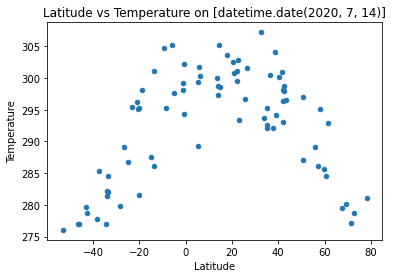

<Figure size 432x288 with 0 Axes>

In [14]:
clean_cities_df.plot.scatter("Latitude", "Temperature")
plt.title(f'Latitude vs Temperature on {clean_cities_df["just_date"].unique()}')
plt.show()
plt.savefig("../output_data/LatvsTemp.png")

## Latitude vs. Humidity Plot

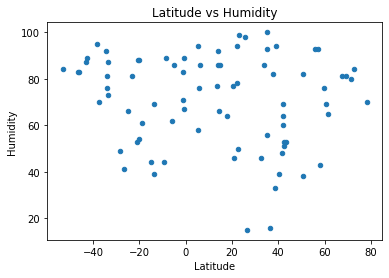

<Figure size 432x288 with 0 Axes>

In [15]:
clean_cities_df.plot.scatter("Latitude", "Humidity")
plt.title("Latitude vs Humidity")
plt.show()
plt.savefig("../output_data/LatvsHumid.png")

## Latitude vs. Cloudiness Plot

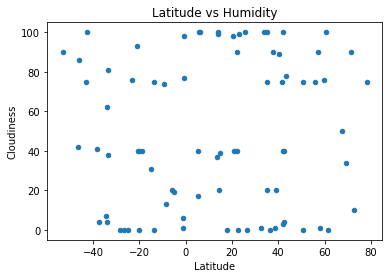

<Figure size 432x288 with 0 Axes>

In [16]:
clean_cities_df.plot.scatter("Latitude", "Cloudiness")
plt.title("Latitude vs Humidity")
plt.show()
plt.savefig("../output_data/LatvsClouds.png")

## Latitude vs. Wind Speed Plot

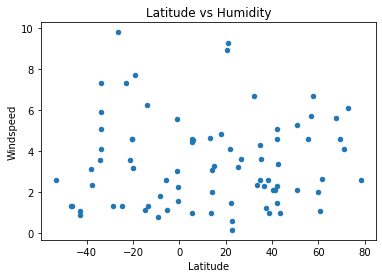

<Figure size 432x288 with 0 Axes>

In [17]:
clean_cities_df.plot.scatter("Latitude", "Windspeed")
plt.title("Latitude vs Humidity")
plt.show()
plt.savefig("../output_data/LatvsWS.png")

## Linear Regression

In [84]:
# OPTIONAL: Create a function to create Linear Regression plots

def linearregression(x,y,xlabel, ylabel, annotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,annotate,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{xlabel} "vs" {ylabel}')
    plt.show()
    


In [85]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = clean_cities_df.loc[clean_cities_df['Latitude']>=0]
northern_hemisphere_df.dropna(how = 'all', axis =1)
southern_hemisphere_df = clean_cities_df.loc[clean_cities_df['Latitude']<0]
southern_hemisphere_df.dropna(how = 'all', axis =1)

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Date,just_date
0,Alofi,-19.06,-169.92,298.15,61,40,7.70,2020-07-14 21:15:57,2020-07-14
1,Hermanus,-34.42,19.23,277.04,92,7,3.58,2020-07-14 21:15:57,2020-07-14
3,Cape Town,-33.93,18.42,281.39,76,4,4.10,2020-07-14 21:14:49,2020-07-14
6,Port Alfred,-33.59,26.89,284.56,73,38,7.31,2020-07-14 21:15:58,2020-07-14
10,Aripuanã,-9.17,-60.63,304.67,44,74,0.80,2020-07-14 21:15:59,2020-07-14
12,Busselton,-33.65,115.33,281.99,87,81,5.93,2020-07-14 21:15:59,2020-07-14
17,Manta,-0.95,-80.73,298.11,71,1,5.57,2020-07-14 21:16:00,2020-07-14
19,Mahébourg,-20.41,57.70,295.15,88,40,4.60,2020-07-14 21:16:00,2020-07-14
20,Manicoré,-5.81,-61.30,305.15,62,20,2.60,2020-07-14 21:16:00,2020-07-14
23,Port Elizabeth,-33.92,25.57,282.15,81,62,5.10,2020-07-14 21:16:01,2020-07-14


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

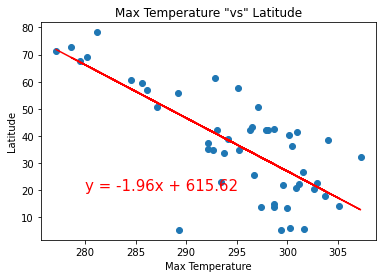

<Figure size 432x288 with 0 Axes>

In [97]:
#call function
linearregression(northern_hemisphere_df['Temperature'],northern_hemisphere_df['Latitude'], "Max Temperature", "Latitude", (280,20))
#sav fig
plt.savefig("../output_data/NorthMaxTempvsLat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

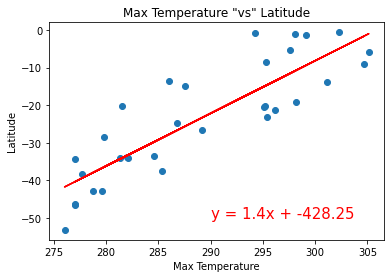

<Figure size 432x288 with 0 Axes>

In [98]:
#call function
linearregression(southern_hemisphere_df['Temperature'],southern_hemisphere_df['Latitude'], "Max Temperature", "Latitude", (290,-50))
#save figure
plt.savefig("../output_data/SouthMaxTempvsLat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

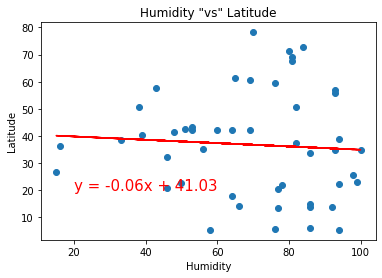

<Figure size 432x288 with 0 Axes>

In [99]:
#Call function
linearregression(northern_hemisphere_df['Humidity'],northern_hemisphere_df['Latitude'], "Humidity", "Latitude", (20,20))
#save figure
plt.savefig("../output_data/NorthHumidvsLat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

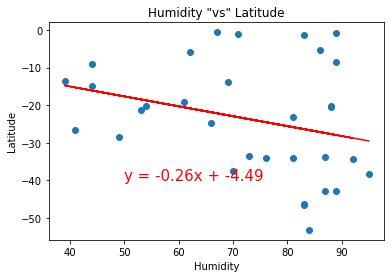

<Figure size 432x288 with 0 Axes>

In [100]:
#call function
linearregression(southern_hemisphere_df['Humidity'],southern_hemisphere_df['Latitude'], "Humidity", "Latitude", (50, -40))
#save figure
plt.savefig("../output_data/SouthHumidvsLat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

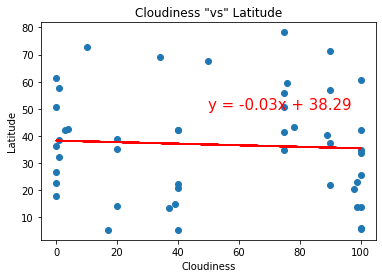

<Figure size 432x288 with 0 Axes>

In [101]:
#call function
linearregression(northern_hemisphere_df['Cloudiness'],northern_hemisphere_df['Latitude'], "Cloudiness", "Latitude", (50,50))
#Sav fig
plt.savefig("../output_data/NorthCloudvsLat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

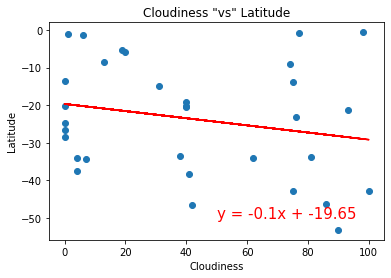

<Figure size 432x288 with 0 Axes>

In [102]:
#call function
linearregression(southern_hemisphere_df['Cloudiness'],southern_hemisphere_df['Latitude'], "Cloudiness", "Latitude", (50,-50))
#sav fig
plt.savefig("../output_data/SouthCloudvsLat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

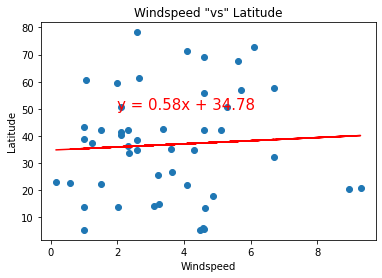

<Figure size 432x288 with 0 Axes>

In [103]:
#call function
linearregression(northern_hemisphere_df['Windspeed'],northern_hemisphere_df['Latitude'],"Windspeed", "Latitude", (2,50) )
#sav fig
plt.savefig("../output_data/NorthWSvsLat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

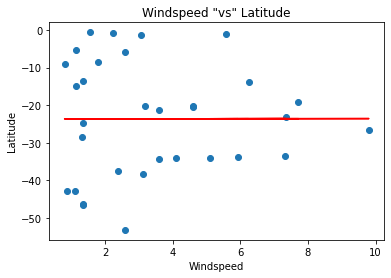

<Figure size 432x288 with 0 Axes>

In [104]:
#Call function
linearregression(southern_hemisphere_df['Windspeed'],southern_hemisphere_df['Latitude'], "Windspeed", "Latitude", (6, -60))
#sav fig
plt.savefig("../output_data/SouthWSvsLat.png")